**Course 2 tasks:-**

1. Build a dataframe for the TikTok dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import folium
from folium.plugins import MarkerCluster
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

2. Read in data from TikTok csv file

In [2]:
df = pd.read_csv('/content/tiktok.csv')
df.head(5)

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,playlist_id,playlist_name,duration_mins,genre
0,6kVuF2PYLuvl9T85XjNbaO,Lay It Down Gmix - Main,1Xfmvd48oOhEWkscWyEbh9,Lloyd,43C6GVlhXG4KfZuEbxty3r,302186,2011-01-01,28,0.597,0.800,...,0.3120,0.0461,0.0,0.1800,0.565,155.932,6kVuF2PYLuvl9T85XjNbaO,6kVuF2PYLuvl9T85XjNbaO,5.036433,TIKTOK DANCE
1,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
2,1RGIjMFMgJxkZHMDXVYzOJ,Bartender (feat. Akon),3aQeKQSyrW4qWr35idm0cy,T-Pain,6CrSEKCF4TYrbSIitegb3h,238800,2007-06-05,75,0.832,0.391,...,0.0628,0.0564,0.0,0.2240,0.436,104.961,1RGIjMFMgJxkZHMDXVYzOJ,1RGIjMFMgJxkZHMDXVYzOJ,3.980000,TIKTOK DANCE
3,1dIWPXMX4kRHj6Dt2DStUQ,Chosen (feat. Ty Dolla $ign),4qXC0i02bSFstECuXP2ZpL,Blxst,7AwrgenNcTAJlJF3pKL0Qr,161684,2020-12-04,76,0.571,0.767,...,0.2870,0.3360,0.0,0.0809,0.605,93.421,1dIWPXMX4kRHj6Dt2DStUQ,1dIWPXMX4kRHj6Dt2DStUQ,2.694733,TIKTOK DANCE
4,4QVS8YCpK71R4FsxSMCjhP,Tie Me Down (with Elley Duhé),2ZRQcIgzPCVaT9XKhXZIzh,Gryffin,69t8rpgBN1ov5kCU6LDMuR,218295,2018-08-03,72,0.548,0.839,...,0.0644,0.1350,0.0,0.1020,0.314,98.932,4QVS8YCpK71R4FsxSMCjhP,4QVS8YCpK71R4FsxSMCjhP,3.638250,TIKTOK DANCE


3. Display rows within dataframe

In [3]:
df.shape

(6746, 23)

4. Examine data type of each column

In [4]:
colunm_list=df.columns.tolist()
colunm_list

['track_id',
 'track_name',
 'artist_id',
 'artist_name',
 'album_id',
 'duration',
 'release_date',
 'popularity',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'playlist_id',
 'playlist_name',
 'duration_mins',
 'genre']

5. Gather descriptive statistics

In [5]:
df.dtypes

track_id             object
track_name           object
artist_id            object
artist_name          object
album_id             object
duration              int64
release_date         object
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
playlist_id          object
playlist_name        object
duration_mins       float64
genre                object
dtype: object

In [6]:
df.describe()

,duration,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins
count,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000,6746.000000
mean,194428.739253,57.649422,0.740926,0.624474,5.292914,-7.005657,0.581382,0.140059,0.219776,0.033784,0.177595,0.547327,120.525980,3.240479
std,59208.593470,24.616537,0.137951,0.174433,3.746116,2.846230,0.493369,0.128355,0.236456,0.138327,0.135816,0.230005,25.597213,0.986810
min,43426.000000,0.000000,0.150000,0.023700,0.000000,-26.888000,0.000000,0.023200,0.000010,0.000000,0.019300,0.033100,54.367000,0.723767
25%,155866.000000,44.000000,0.663000,0.504000,1.000000,-8.534000,0.000000,0.048600,0.031700,0.000000,0.092700,0.372000,100.053000,2.597767
50%,186980.000000,64.000000,0.757000,0.621000,6.000000,-6.609000,1.000000,0.084200,0.130000,0.000000,0.122000,0.543000,120.986000,3.116333
75%,224284.000000,76.000000,0.843000,0.752000,9.000000,-5.018000,1.000000,0.203000,0.321000,0.000215,0.224000,0.735000,135.001750,3.738067
max,716206.000000,100.000000,0.990000,0.999000,11.000000,1.077000,1.000000,0.911000,0.991000,0.962000,0.952000,0.998000,216.053000,11.936767


In [7]:
df.isnull().sum()

track_id            0
track_name          0
artist_id           0
artist_name         0
album_id            0
duration            0
release_date        0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
playlist_id         0
playlist_name       0
duration_mins       0
genre               0
dtype: int64

In [8]:
# Find the number of duplicated values in each column
duplicates_by_column = df.apply(lambda x: x.duplicated().sum())

# Print the number of duplicates for each column
print(duplicates_by_column)

track_id            3186
track_name          3537
artist_id           4659
artist_name         4660
album_id            3468
duration            3524
release_date        5489
popularity          6645
danceability        6125
energy              5977
key                 6734
loudness            3838
mode                6744
speechiness         5684
acousticness        5116
instrumentalness    5324
liveness            5800
valence             5815
tempo               3630
playlist_id         4188
playlist_name       4188
duration_mins       3524
genre               6742
dtype: int64


6. Visualize the TikTok data in Python

6.1 Histograms and Distributions:

*Visualize the distribution of numeric features like 'duration', 'popularity', 'danceability', 'duration' etc., using histograms.

*Explore the distribution of 'duration_mins' as it's a derived numeric feature.

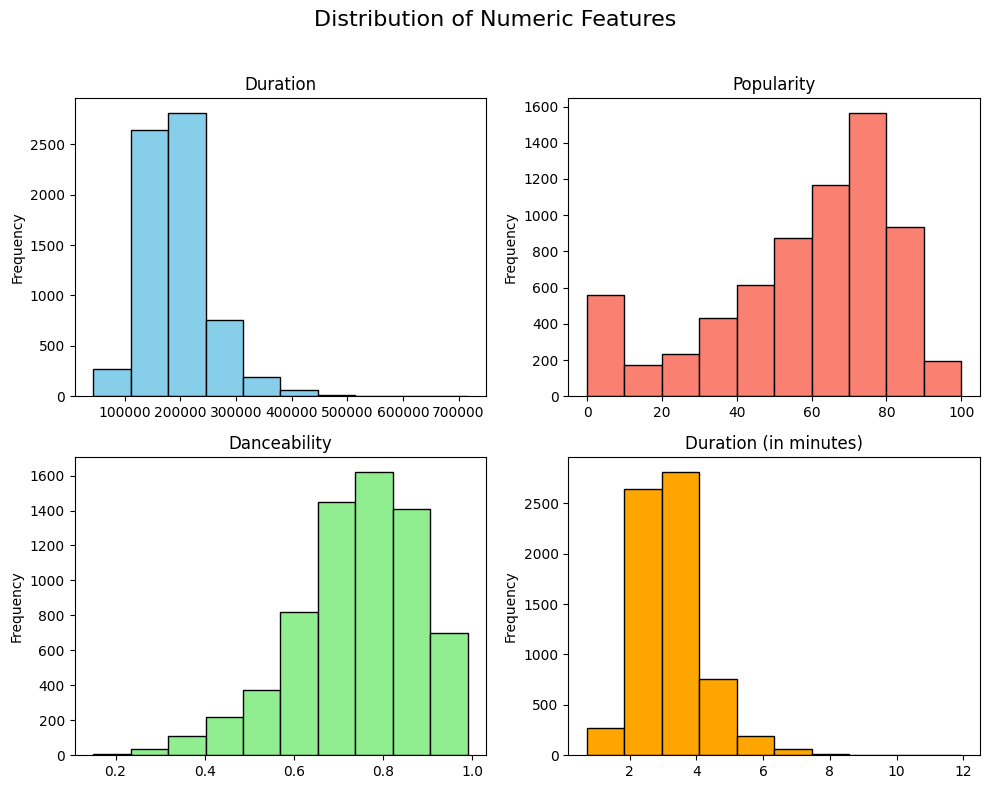

In [9]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Distribution of Numeric Features', fontsize=16)

# Plot histograms
df['duration'].plot(kind='hist', bins=10, ax=axes[0, 0], edgecolor='black', color='skyblue')
axes[0, 0].set_title('Duration')

df['popularity'].plot(kind='hist', bins=10, ax=axes[0, 1], edgecolor='black', color='salmon')
axes[0, 1].set_title('Popularity')

df['danceability'].plot(kind='hist', bins=10, ax=axes[1, 0], edgecolor='black', color='lightgreen')
axes[1, 0].set_title('Danceability')

df['duration_mins'].plot(kind='hist', bins=10, ax=axes[1, 1], edgecolor='black', color='orange')
axes[1, 1].set_title('Duration (in minutes)')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

6.2 Box Plots:

*Use box plots to show the distribution of numeric features, helping identify outliers.

*Explore box plots for 'popularity' based on different categorical variables like 'Popularity by Mode', 'Popularity by Key','Danceability by Mode', or 'Energy by Key'.

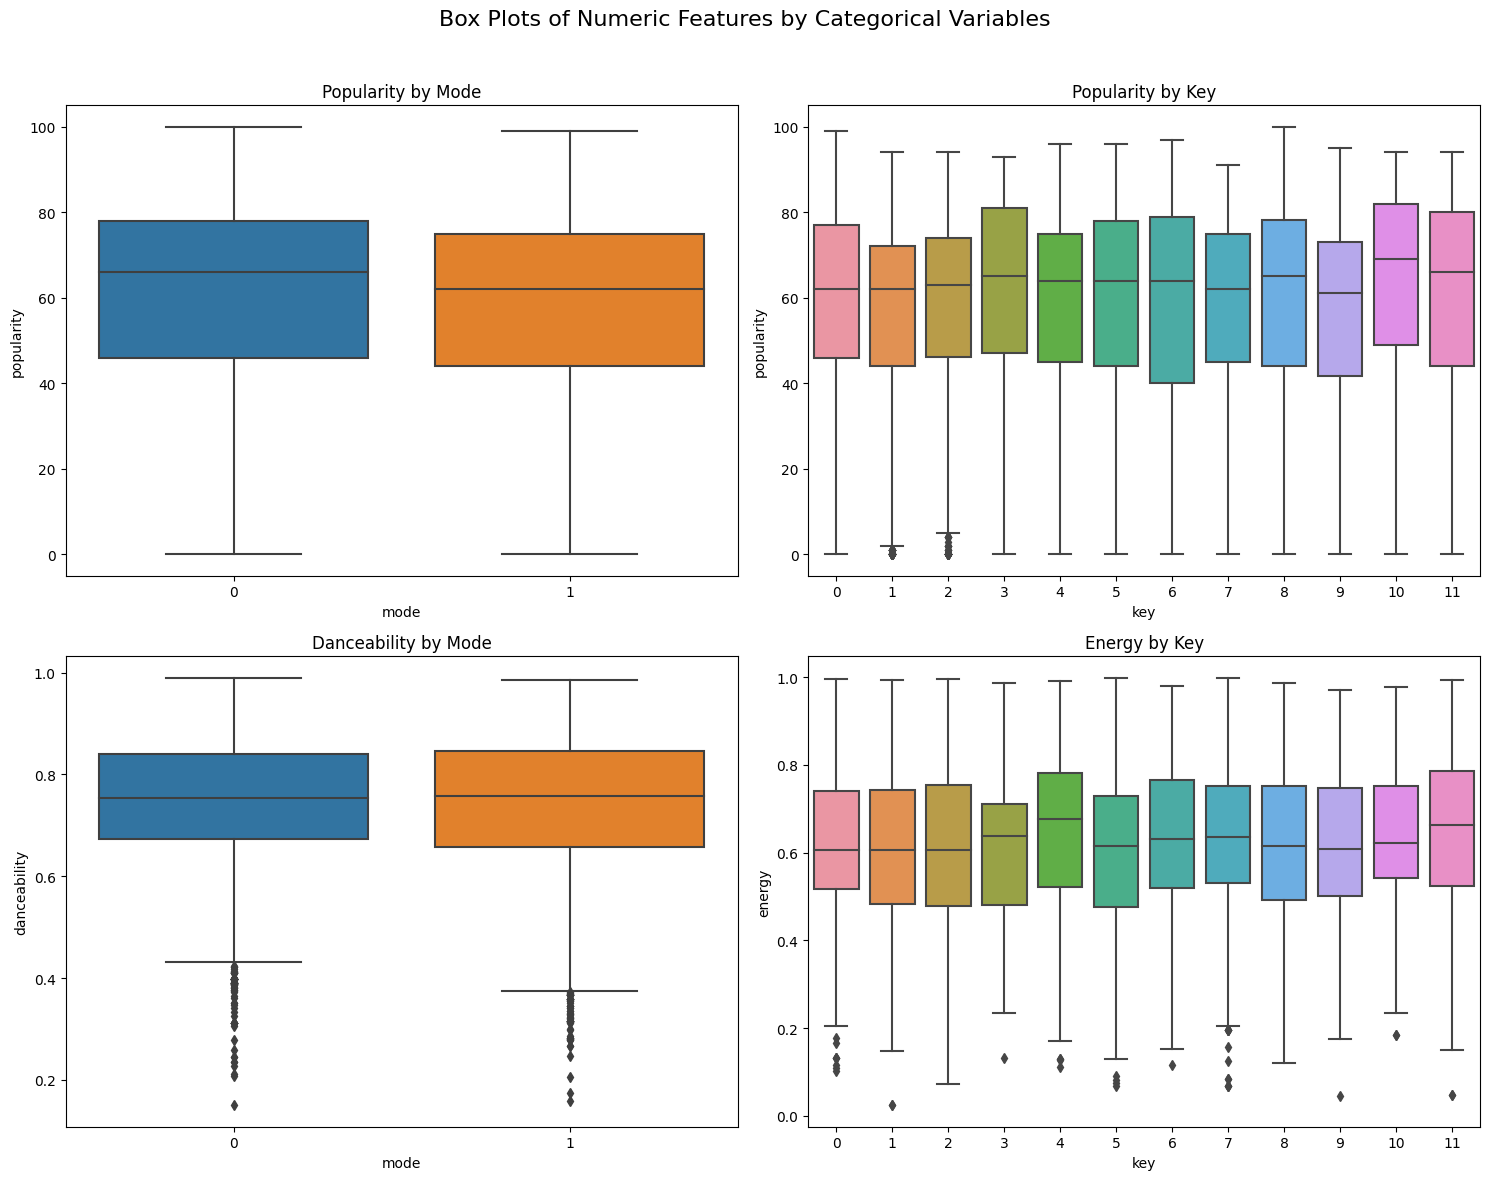

In [10]:
# Set up the figure and axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Box Plots of Numeric Features by Categorical Variables', fontsize=16)

# Plot box plots
sns.boxplot(x='mode', y='popularity', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Popularity by Mode')

sns.boxplot(x='key', y='popularity', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Popularity by Key')

sns.boxplot(x='mode', y='danceability', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Danceability by Mode')

sns.boxplot(x='key', y='energy', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Energy by Key')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()


6.3 Correlation Heatmap:

*Create a heatmap to visualize the correlation matrix between numeric features ('duration', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins').

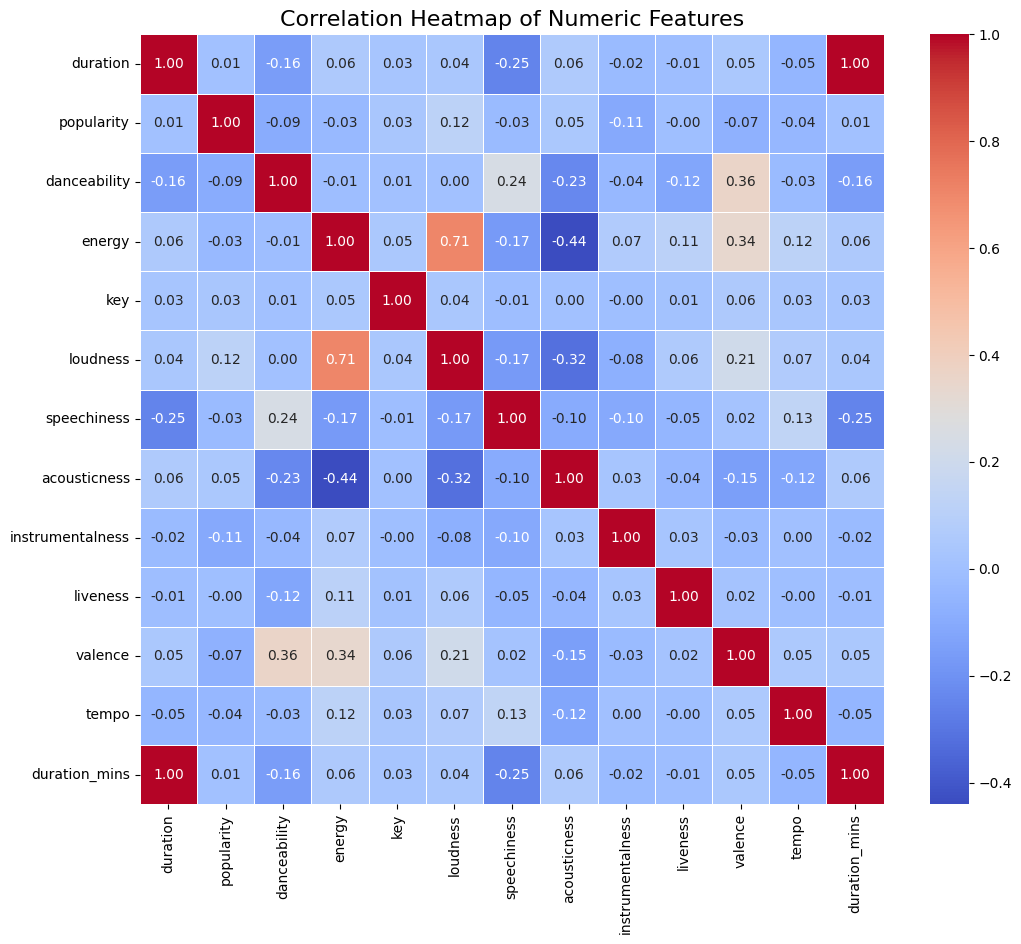

In [11]:
# Selecting relevant numeric columns
numeric_columns = ['duration', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins']

# Calculate the correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.show()


6.4 Pair Plots:

Use pair plots to visualize scatter plots between pairs of numeric features, facilitating an understanding of potential relationships.

In [12]:
# Selecting relevant numeric columns
numeric_columns = ['duration', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins']

# Create a pair plot
sns.pairplot(df[numeric_columns])

# Show the plot
plt.show()


Output hidden; open in https://colab.research.google.com to view.

6.5 Bar Charts:

*Create bar charts to show counts or averages for categorical variables like 'mode','key', 'playlist_name', or 'genre'.

*Explore the distribution of 'popularity' across different 'mode' values.

<ipython-input-13-1bbd10c935cd>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='mode', y='popularity', data=df, ci=None, palette='mako', ax=axes[1])


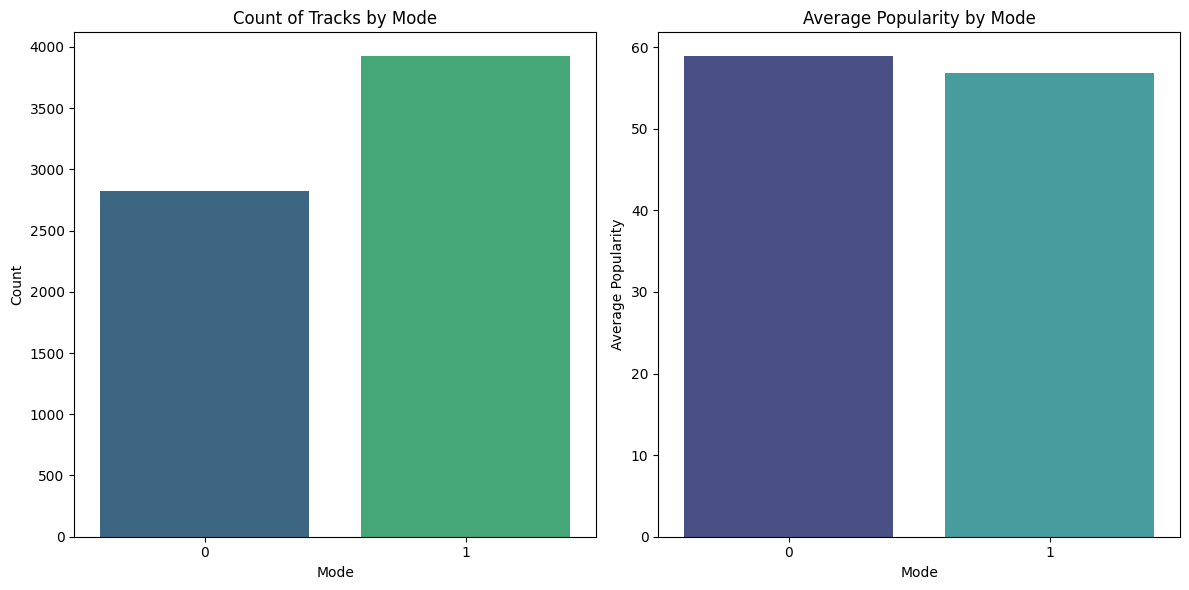

In [13]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Bar chart for counts of each mode
sns.countplot(x='mode', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Count of Tracks by Mode')
axes[0].set_xlabel('Mode')
axes[0].set_ylabel('Count')

# Bar chart for average popularity by mode
sns.barplot(x='mode', y='popularity', data=df, ci=None, palette='mako', ax=axes[1])
axes[1].set_title('Average Popularity by Mode')
axes[1].set_xlabel('Mode')
axes[1].set_ylabel('Average Popularity')

# Adjust layout for better visualization
plt.tight_layout()

# Show the combined plot
plt.show()

6.6 Scatter Plots:

*Visualize relationships between two numeric variables, such as 'energy' vs. 'loudness' or 'tempo' vs. 'valence'.

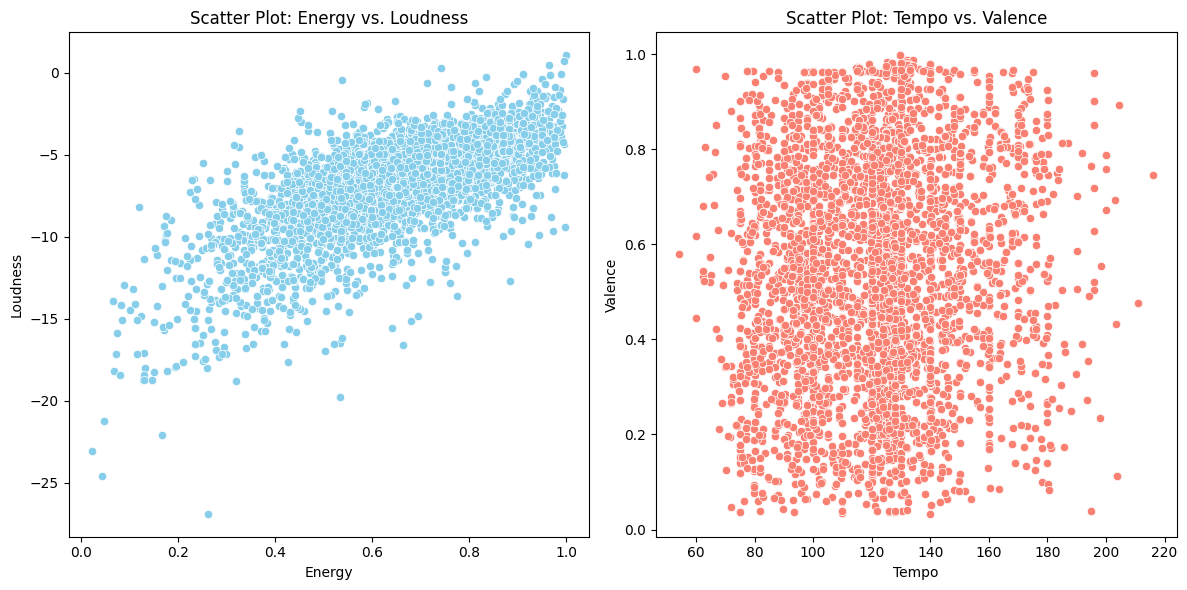

In [14]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Scatter plot for energy vs. loudness
sns.scatterplot(x='energy', y='loudness', data=df, color='skyblue', ax=axes[0])
axes[0].set_title('Scatter Plot: Energy vs. Loudness')
axes[0].set_xlabel('Energy')
axes[0].set_ylabel('Loudness')

# Scatter plot for tempo vs. valence
sns.scatterplot(x='tempo', y='valence', data=df, color='salmon', ax=axes[1])
axes[1].set_title('Scatter Plot: Tempo vs. Valence')
axes[1].set_xlabel('Tempo')
axes[1].set_ylabel('Valence')

# Adjust layout for better visualization
plt.tight_layout()

# Show the combined plot
plt.show()


6.7 Time Series Plots:

*If relevant, create time series plots for 'release_date' to observe trends or patterns over time.

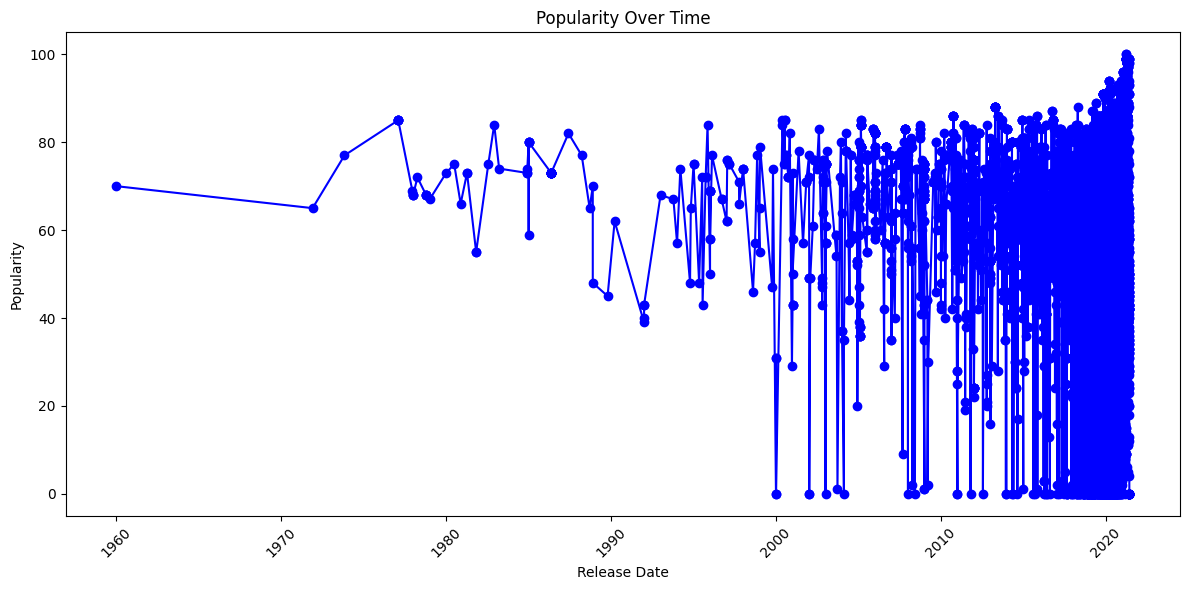

In [15]:
# Make sure 'release_date' is in datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

# Sort the DataFrame by release date
df = df.sort_values(by='release_date')

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['popularity'], marker='o', linestyle='-', color='b')
plt.title('Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


6.8 Pie Charts:

*Use a pie chart to show the distribution of 'mode' or 'key' values.

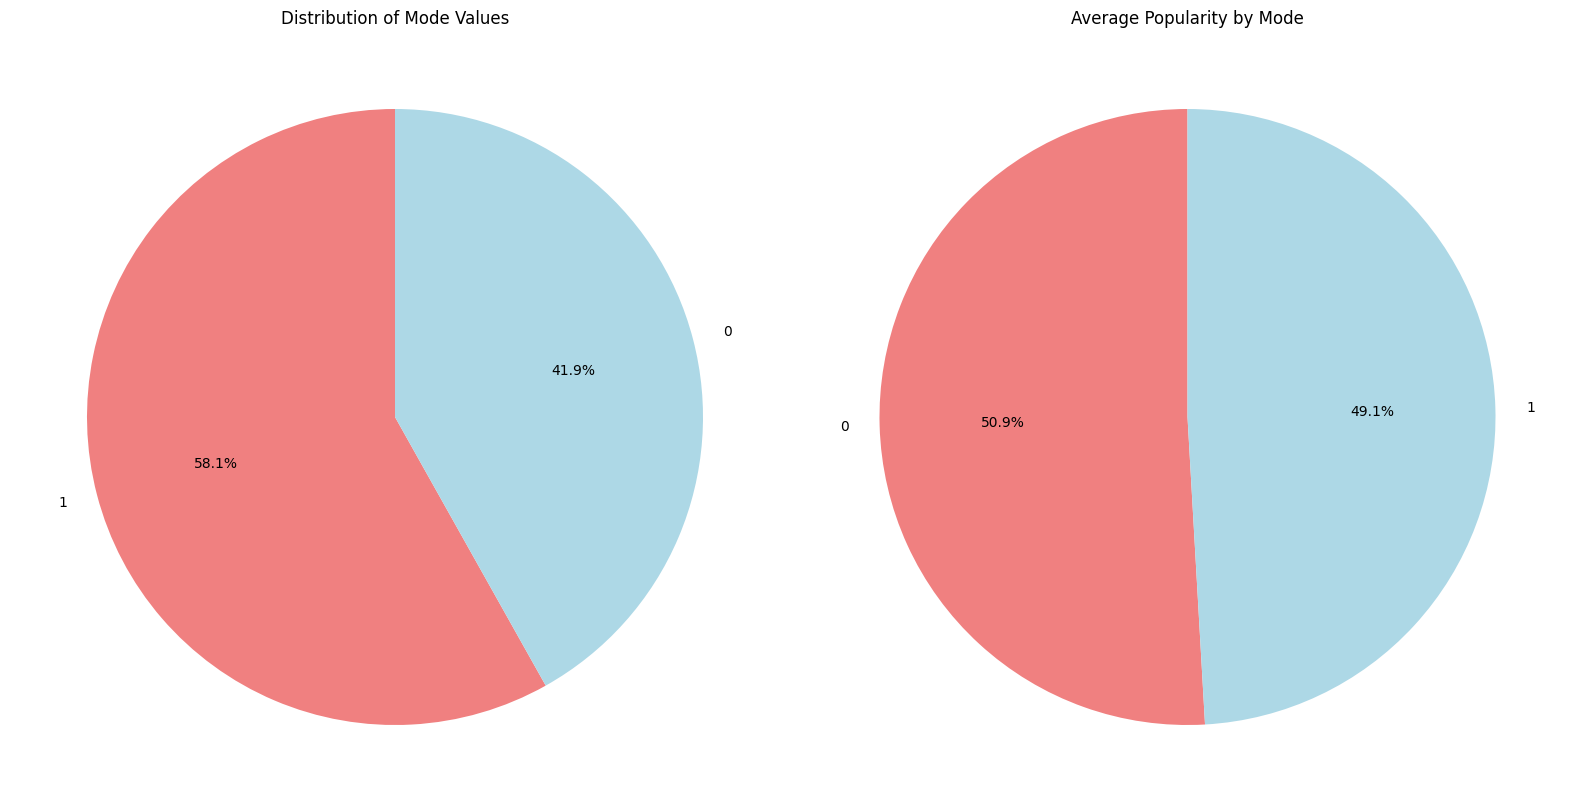

In [16]:
# Count the occurrences of each mode
mode_counts = df['mode'].value_counts()

# Calculate average popularity by mode
average_popularity_by_mode = df.groupby('mode')['popularity'].mean()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the pie chart for mode distribution
axes[0].pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[0].set_title('Distribution of Mode Values')

# Plot the pie chart for average popularity by mode
axes[1].pie(average_popularity_by_mode, labels=average_popularity_by_mode.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
axes[1].set_title('Average Popularity by Mode')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


6.9 Word Clouds:

*If applicable, generate a word cloud for textual features like 'track_name' to highlight frequently occurring words.

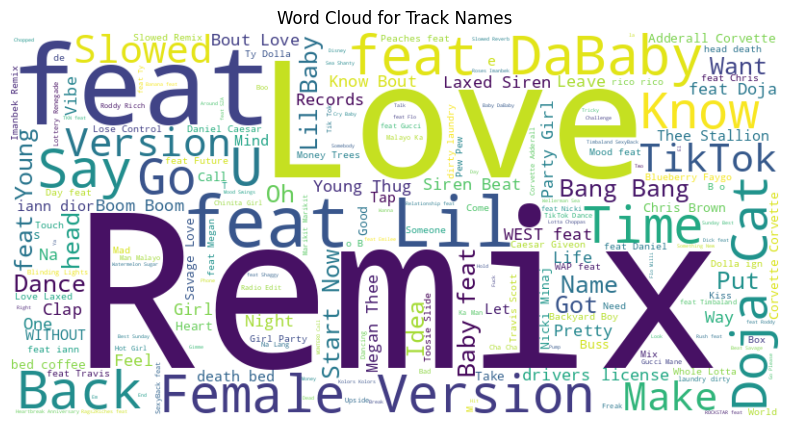

In [17]:
# Combine text data (track names) into a single string
text_data = ' '.join(df['track_name'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Track Names')
plt.show()


6.10 KDE (Kernel Density Estimation) Plots:

*Use KDE plots to estimate the probability density function of a numeric variable, providing a smooth representation of the distribution.

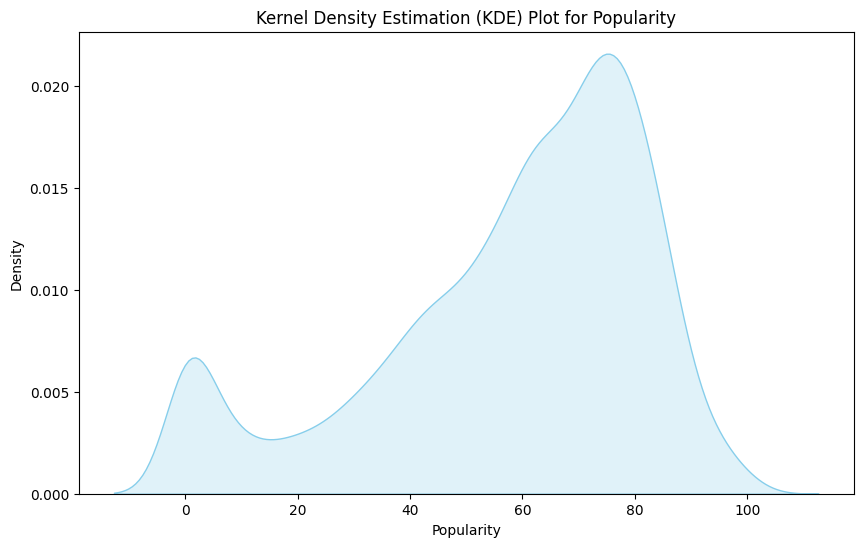

In [18]:
# Create a KDE plot for 'popularity'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['popularity'], fill=True, color='skyblue')
plt.title('Kernel Density Estimation (KDE) Plot for Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()


6.11 Radar Charts:

*There have multiple numeric features that represent different aspects (e.g., 'danceability', 'energy', 'valence'), use radar charts to compare them for different tracks.

In [19]:
numeric_columns = ['danceability', 'energy', 'valence']

# Normalizing the data to bring all features to the same scale
df_normalized = df[numeric_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create a radar chart
fig = px.line_polar(df_normalized, r=df_normalized.mean(), theta=numeric_columns, line_close=True, title='Radar Chart of Numeric Features')
fig.show()

6.12 Bubble Charts:

*Create bubble charts to represent three dimensions of data, for example, using 'tempo', 'valence', and 'popularity'.

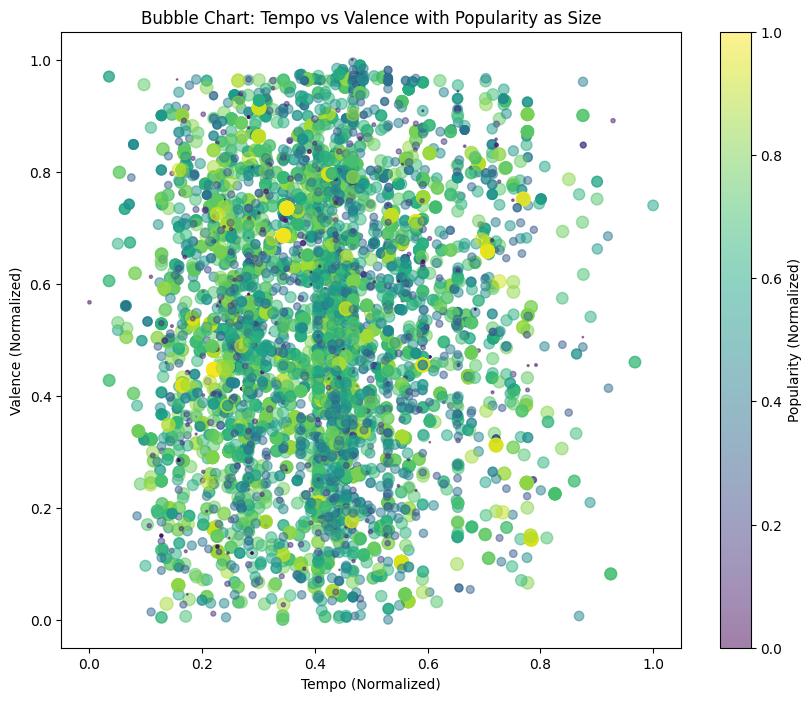

In [20]:
# Selecting relevant columns
columns = ['tempo', 'valence', 'popularity']

# Normalizing the data for better visualization
df_normalized = df[columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Create a bubble chart
plt.figure(figsize=(10, 8))
plt.scatter(
    df_normalized['tempo'],
    df_normalized['valence'],
    s=df_normalized['popularity'] * 100,  # Scale the size of the bubbles based on 'popularity'
    alpha=0.5,  # Set transparency
    cmap='viridis',  # Set the color map
    c=df_normalized['popularity'],  # Set color based on 'popularity'
)

# Add labels and title
plt.title('Bubble Chart: Tempo vs Valence with Popularity as Size')
plt.xlabel('Tempo (Normalized)')
plt.ylabel('Valence (Normalized)')

# Add a colorbar to show the mapping of 'popularity' to color
cbar = plt.colorbar()
cbar.set_label('Popularity (Normalized)')

plt.show()


6.13 Sunburst Chart:

*If your data has a hierarchical structure, create a sunburst chart to represent the hierarchy, such as 'genre' nested within 'playlist_name'.

In [21]:
# Create a sunburst chart
fig = px.sunburst(df, path=['playlist_name', 'genre'], title='Sunburst Chart: Genre Nested Within Playlist Name')

# Show the plot
fig.show()


6.14 3D Scatter Plots:

*Three are 3 numeric variables. now create a 3D scatter plot to explore their relationships.

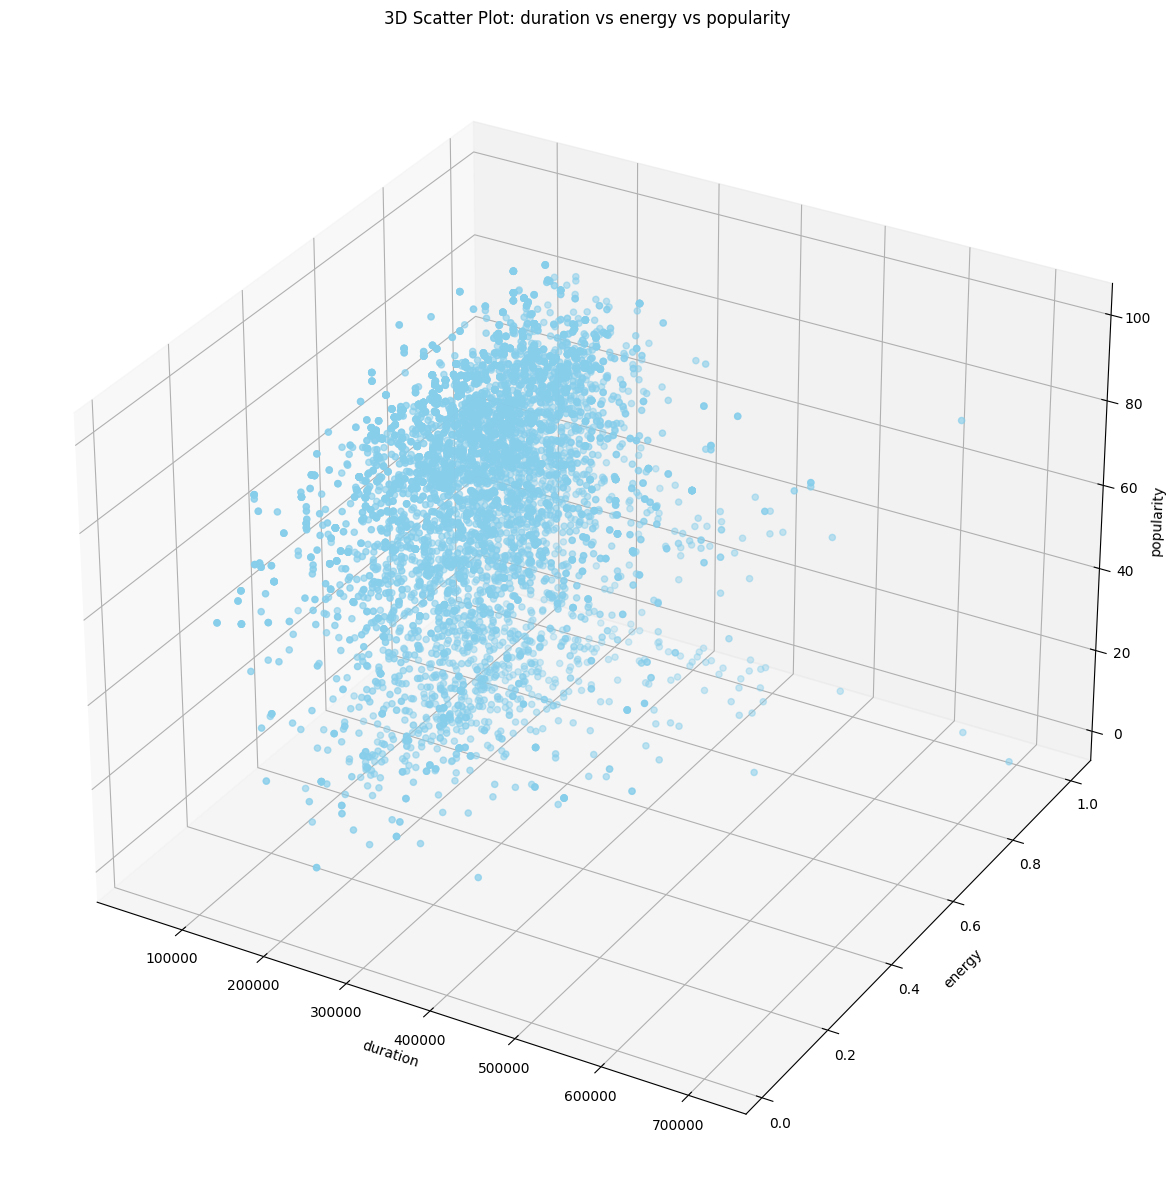

In [22]:
# Select three numeric variables
x_variable = 'duration'
y_variable = 'energy'
z_variable = 'popularity'

# Create a 3D scatter plot
fig = plt.figure(figsize=(15,15 ))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df[x_variable], df[y_variable], df[z_variable], c='skyblue', marker='o')

# Set labels and title
ax.set_xlabel(x_variable)
ax.set_ylabel(y_variable)
ax.set_zlabel(z_variable)
ax.set_title(f'3D Scatter Plot: {x_variable} vs {y_variable} vs {z_variable}')

plt.show()


6.15 Categorical Plots:

*Use Seaborn's categorical plots, such as 'sns.catplot()', to explore relationships between categorical and numeric variables.

<Figure size 1200x800 with 0 Axes>

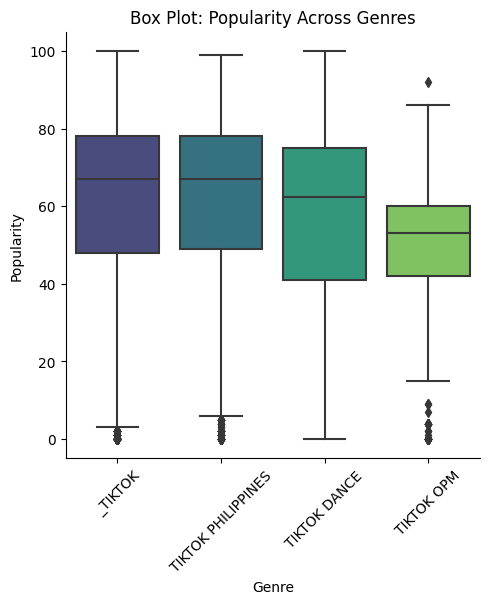

In [23]:
# Create a catplot to explore the relationship between 'genre' and 'popularity'
plt.figure(figsize=(12, 8))
sns.catplot(x='genre', y='popularity', data=df, kind='box', palette='viridis')
plt.title('Box Plot: Popularity Across Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


6.16 Bullet Graphs:

*Represent the performance of a metric against a target value using bullet graphs for features like 'popularity'.

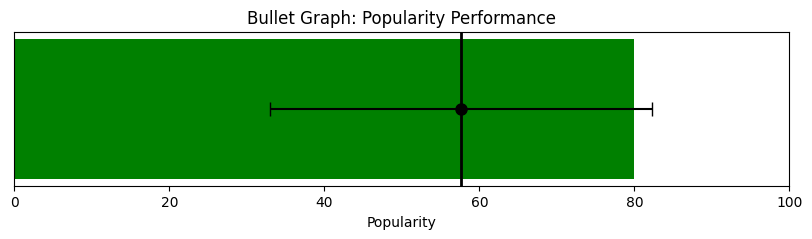

In [24]:
# Select a metric and target value ('popularity')
metric_name = 'popularity'
target_value = 80

# Calculate mean and standard deviation for reference benchmarks
mean_value = df[metric_name].mean()
std_dev = df[metric_name].std()

# Create a bullet graph
fig, ax = plt.subplots(figsize=(10, 2))

# Plot the actual value
ax.barh(0, df[metric_name].values[0], color='gray', height=0.4)

# Plot the target value
ax.barh(0, target_value, color='green', height=0.4)

# Plot the benchmark ranges
ax.errorbar(x=mean_value, y=0, xerr=std_dev, color='black', fmt='o', markersize=8, capsize=5)
ax.axvline(x=mean_value, color='black', linestyle='-', linewidth=2)

# Set the x-axis limit based on the metric's range
ax.set_xlim(0, 100)

# Remove y-axis labels and ticks
ax.set_yticks([])
ax.set_yticklabels([])

# Add title and labels
plt.title(f'Bullet Graph: {metric_name.capitalize()} Performance')
plt.xlabel(metric_name.capitalize())

# Show the plot
plt.show()


7. Report to TikTok’s data team through an executive summary

At first I import some python libraries.

Then I read the csv file which is 'tiktok.csv'.

There are 6746 rows and 23 columns.

In this dataset, there is no niull value.

The columns are:

1. track_id (object):- Identifier for each track. There are 3186 duplicate values.

2. track_name (object):- The name of the track. There are 3537 duplicate values.

3. artist_id (object):- Identifier for the artist of the track. There are 4659 duplicate values.

4. artist_name (object):- The name of the artist who created the track. There are 4660 duplicate values.

5. album_id (object):- Identifier for the album that contains the track. There are 3468 duplicate values.

6. duration (int64):- The duration of the track in seconds. There are 3524 duplicate values.

7. release_date (object):- The date when the track was released. There are 5489 duplicate values.

8. popularity (int64):- A measure of the track's popularity, often determined by factors like the number of listens or likes. There are 6645 duplicate values.

9. danceability (float64):- A measure of how suitable a track is for dancing based on musical elements. There are 6125 duplicate values.

10. energy (float64):- Represents the intensity and activity of the music. There are 5977 duplicate values.

11. key (int64):- The key the track is in, which is a musical attribute that determines the tonal center or home base of a musical piece. There are 6734 duplicate values.

12. loudness (float64):- The overall loudness of the track in decibels (dB). There are 3838 duplicate values.

13. mode (int64):- Indicates whether the track is in a major (1) or minor (0) key. There are 6744 duplicate values.

14. speechiness (float64):- Detects the presence of spoken words in the track. Values close to 1.0 indicate that the track is likely to be entirely speech. There are 5684 duplicate values.

15. acousticness (float64):- A measure of how acoustic or "unplugged" a track is. There are  5116 duplicate values.

16. instrumentalness (float64):- Predicts whether a track contains no vocals. Values close to 1.0 suggest that the track is instrumental. There are 5324 duplicate values.

17. liveness (float64):-  Detects the presence of an audience in the recording. A value above 0.8 indicates a high probability of the track being performed live. There are 5800 duplicate values.

18. valence (float64):- Tracks with high valence sound more positive, while those with low valence sound more negative. There are 5815 duplicate values.

19. tempo (float64):- The overall estimated tempo of the track in beats per minute (BPM). There are 3630 duplicate values.

20. playlist_id (object):- Identifier for the playlist to which the track belongs. There are 4188 duplicate values.  

21. playlist_name (object):- The name of the playlist to which the track belongs. There are 4188 duplicate values.

22. duration_mins (float64):- The duration of the track in minutes (derived from the 'duration' column). There are 3524 duplicate values.

23. genre (object):- The genre or genres associated with the track. There are 6742 duplicate values.

In 6.1, the histogram shows a comparison of different fetures of a video, such as popularity, duration and dancer ability. The image consists of foure graphs,  each displaying a different aspect of the video. These graphs are color coded to represrent the different features.  

In 6.2, there are boxplots that display outliers.

In 6.3, there is heapmap for various numeric features, showcasng the correlation between different attributes. The colors in the heatmap indicate the strength of the correlation between the attributes, with red representing a strong negative correlation and green and yellow represent moderate correlations.

In 6.4, there is a Pair Plots.The image could be seen as a representation of a large number of data points, or as a visualization of a mathematical concept such as a graph.

In 6.5, there is a Bar Charts. In the dataset the cloumn 'mode' has two tupes of data one is '1' another one is '0'. In that figure there is two pypes of Bar Charts. one is count Bar Charts and another one is average count.

In 6.6, there are two Scatter Plots. One is 'energy' vs. 'loudness' another one is 'tempo' vs. 'valence'.

In 6.7, there is a Time Series Plot. By using the 'release_date' to observe trends or patterns over time. Here start time is 1960 and end is 2020.

In 6.8, There is a Pie Chart 'mode' values. There are two Pie Charts. one is 'Distribution of Mode Values' which '1' value's percent is 58.1, '0' value's percent is 41.9 and another one is 'Average Popularity by Mode' which '1' value's percent is 50.9 , '0' value's percent is 49.1.

In 6.9, there is a Word Cloud. Here show the all the 'track_name' persons.

In 6.10, there is a KDE (Kernel Density Estimation) Plot. The image displays a graph showing the popularity of a Kernel Density Estimation (KDE) plot. The graph is a blue line that represents the popularity of the KDE plot, with the x-axis showing the popularity and the y-axis showing the number of popularity. This graph is repersent the Negative Square Normal Distribution.

In 6.11, there is a Radar Chart. Radar charts are primarily suited for strikingly showing outliers. In that Image ther is outlier 'danceability'.

In 6.12, there is a Bubble Chart. There are no outliers in the radar chart of the numeric features danceability and energy.

In 6.13, there's a sunburst chart. There is 'playlist name', if one touches it, it will be shown in detail.

In 6.14, there is a 3D Scatter Plot. The image displays a graph with two different energy levels plotted against each other. The graph shows a line that representing 'energy' levels and another line representing 'popularity'. The graph appears to be a 3D scatter plot, providing a visual representation of the relationship between 'energy' levels and 'popularity' levels and 'duration' levels.

6.15 Categorical Plots: To investigate the connections between categorical and numeric variables, we will focus on the variables 'TIKTOP DANCE', 'TIKTOK OPM', 'TIKTOK PHILIPPINES', and '_TIKTIK'. While 'TIKTOP DANCE' does not have any outliers, 'TIKTOK OPM' and 'TIKTOK PHILIPPINES' do have some outliers, and '_TIKTIK' has a significant number of outliers.

In 6.16, there is a Bullet Graph. The graph is used to compare and analyze the performance of different aspects or products.